In [253]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [254]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score



In [255]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

In [256]:
import matplotlib.pyplot as plt

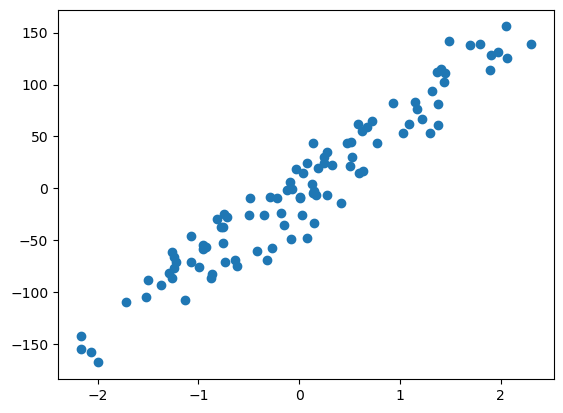

In [257]:
plt.scatter(X,y)

In [258]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [259]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [260]:
y_pred=lr.predict(x_test)

In [261]:
from sklearn.metrics import r2_score
r2=r2_score(y_pred,y_test)
r2

0.918233834001911

In [262]:
m=lr.coef_


In [263]:
lr.intercept_

-1.738719348791475

In [264]:
loss_history=[]


In [265]:
np.mean(cross_val_score(lr,X,y,cv=10,scoring='r2'))

0.900236161832648

In [266]:
class GbRegression:
    def __init__(self, l_rate, epochs):
        self.m = 95.22506146
        self.b = -120
        self.lr = l_rate
        self.e = epochs
        
        
    def fit(self, X, Y):
        for i in range(self.e):
            loss_slope_b = -2 * np.sum(Y - self.m * X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((Y - self.m * X.ravel() - self.b)*X.ravel())
            loss_history.append(loss_slope_b)
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
            
            
        print(self.b,self.m)
    def predict(self,x):
        return (self.m *x)+ self.b

In [267]:
gdr=GbRegression(0.001,30)

In [268]:
gdr.fit(x_train,y_train)

-2.390749061519054 68.60209463328322


In [269]:
y_pred2=gdr.predict(x_test)

In [270]:
r2_score(y_test,y_pred2)

0.9213824752597394

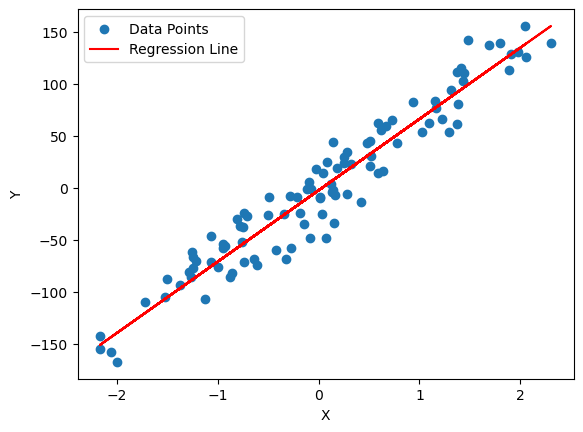

In [271]:
plt.scatter(X, y, label="Data Points")
plt.plot(X, gdr.m * X + gdr.b, color='red', label="Regression Line")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

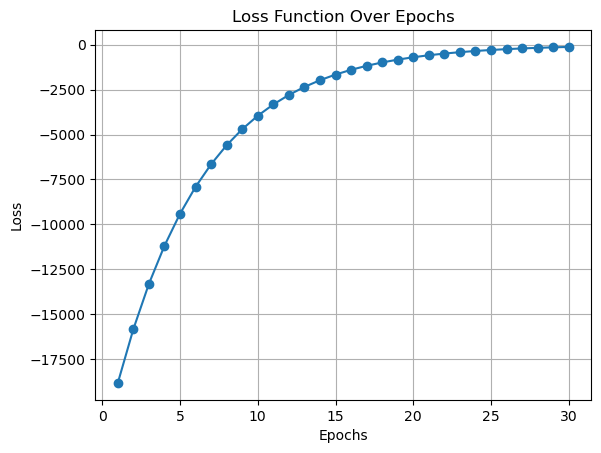

In [272]:
plt.plot(range(1, len(loss_history) + 1), loss_history, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function Over Epochs')
plt.grid(True)
plt.show()